# Analysis notebook: `SU2020d_signal_onspill-LH_aw`  

## Define analysis name

In [1]:
ana_label = "SU2020d_signal_onspill-LH_aw"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020d_signal_onspill-LH_aw

analysis.csv  hists.h5	   SU2020d_signal_onspill-LH_aw.log
cut_flow.csv  results.pkl  SU2020d_signal_onspill-LH_aw.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020d_signal_onspill-LH_aw


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020d_signal_onspill-LH_aw/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020d_signal_onspill-LH_aw/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020d_signal_onspill-LH_aw/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020d_signal_onspill-LH_aw/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/SU2020d_signal_onspill-LH_aw/events.parquet
[Load] ⚠️ File not found: ../../../output/results/SU2020d_signal_onspill-LH_aw/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,1474788,100.000,100.000,No selection applied
1,has_trk_front,Preselect,1474432,99.976,99.976,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,1473015,99.880,99.904,Electron track fits
3,is_downstream,Preselect,1473003,99.879,99.999,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1468842,99.597,99.718,One reco electron / event
5,is_truth_electron,Preselect,1468840,99.597,100.000,Track parents are electrons (truth PID)
6,within_t0,Tracker,1044903,70.851,71.138,t0 at tracker entrance (640 < t_0 < 1650 ns)
7,has_hits,Tracker,970388,65.798,92.869,>20 active tracker hits
8,within_d0,Tracker,916727,62.160,94.470,Distance of closest approach (d_0 < 100 mm)
9,within_pitch_angle_lo,Tracker,916599,62.151,99.986,Extrapolated pitch angle (pz/pt > 0.5


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,869545,816496,597243,0,0,0
1,N,4000000,4000000,4000000,869545,816496,597243
2,Eff [%],21.738625,20.4124,14.931075,100.0,100.0,100.0
3,Eff Err$-$ [%],-0.020616,-0.020146,-0.017811,-0.000115,-0.000122,-0.000167
4,Eff Err$+$ [%],0.02063,0.02016,0.017828,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],869545.0,816496.0,597243.0,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-927.329484,-898.597317,-768.535423,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],928.322648,899.590498,769.528697,1.139434,1.139434,1.139434
8,Rate 2B [$\text{day}^{-1}$],869545.0,816496.0,597243.0,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-927.329484,-898.597317,-768.535423,0.0,0.0,0.0


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020d_signal_onspill-LH_aw/h1o_1x3_mom_windows.png


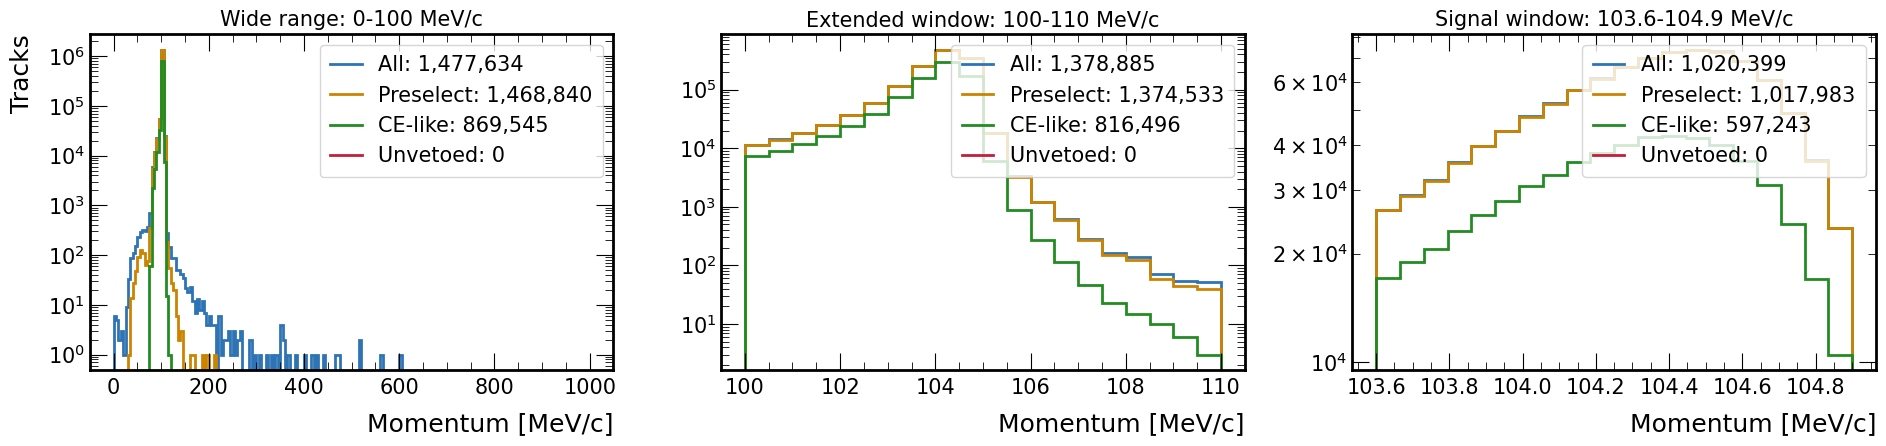

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020d_signal_onspill-LH_aw/h1o_3x3_summary.png


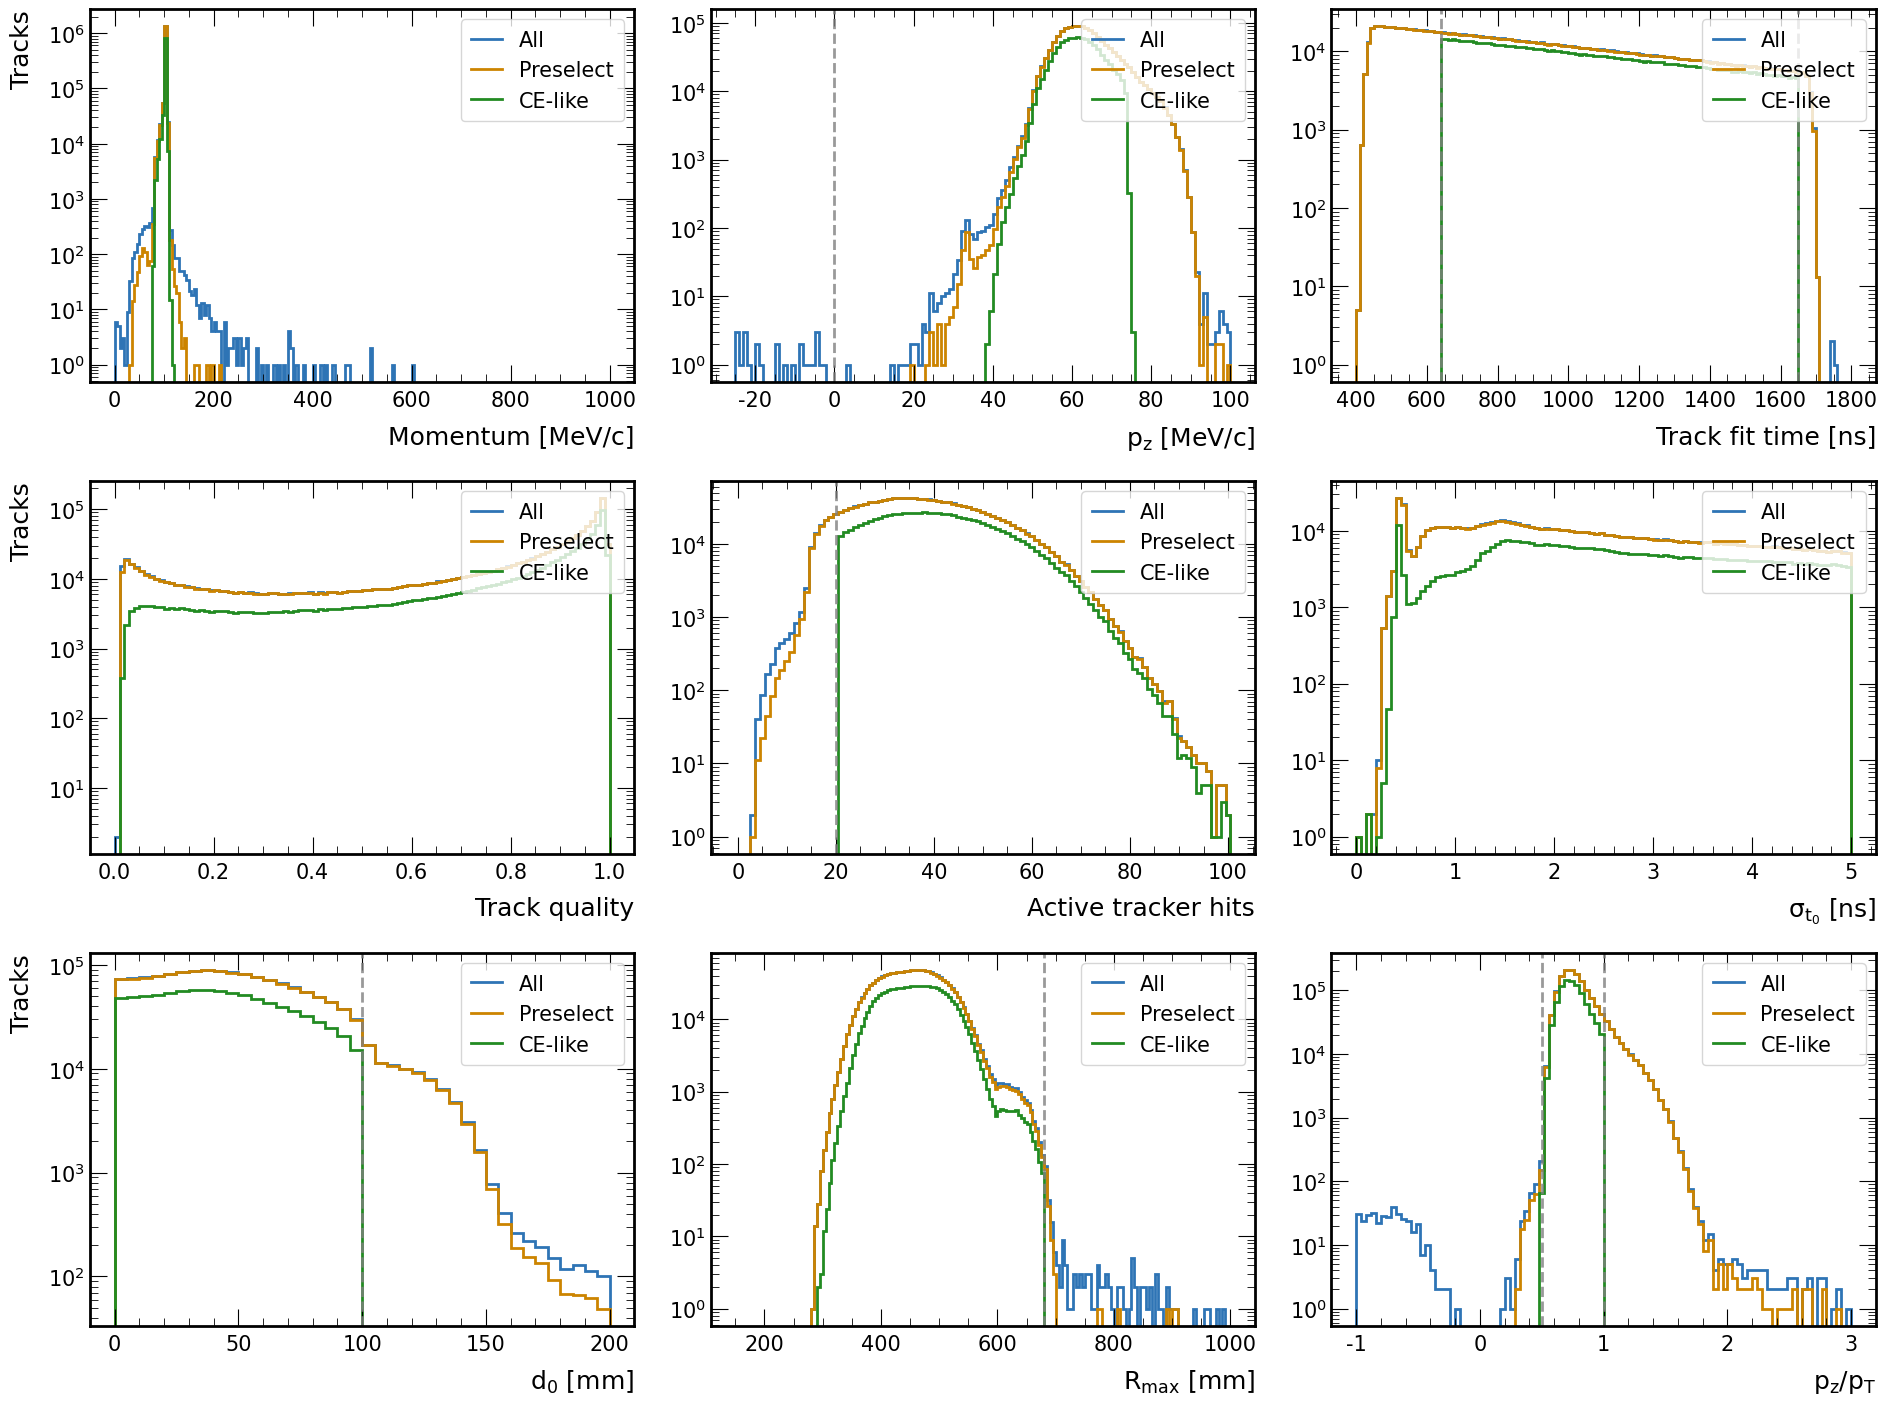

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

In [ ]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [ ]:
print(results["event_info"])

In [ ]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))